# Inception V3 and EfficientB1

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import cv2,os
import tensorflow as tf

In [2]:
import kaggle

OSError: ignored

In [3]:
! mv kaggle.json /root/.kaggle

In [ ]:
import kaggle

In [4]:
! kaggle competitions download -c dog-breed-identification

100% 689M/691M [00:30<00:00, 25.0MB/s]
100% 691M/691M [00:30<00:00, 23.8MB/s]


In [5]:
! unzip -q dog-breed-identification.zip

In [6]:
import pandas as pd
df = pd.read_csv('labels.csv')
df.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


In [7]:
df['filename'] = df['id'] + '.jpg'

In [8]:
df.head()

,id,breed,filename
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull,000bec180eb18c7604dcecc8fe0dba07.jpg
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo,001513dfcb2ffafc82cccf4d8bbaba97.jpg
2,001cdf01b096e06d78e9e5112d419397,pekinese,001cdf01b096e06d78e9e5112d419397.jpg
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick,00214f311d5d2247d5dfe4fe24b2303d.jpg
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever,0021f9ceb3235effd7fcde7f7538ed62.jpg


In [9]:
batch_size =64

In [10]:
from keras.preprocessing.image import ImageDataGenerator

idg = ImageDataGenerator(validation_split=0.1,horizontal_flip=True)

In [11]:
train_idg = idg.flow_from_dataframe(df,'train/','filename','breed',target_size=(224,224),batch_size=batch_size,subset='training')

Found 9200 validated image filenames belonging to 120 classes.


In [12]:
val_idg = idg.flow_from_dataframe(df,'train/','filename','breed',target_size=(224,224),batch_size=batch_size,subset='validation')

Found 1022 validated image filenames belonging to 120 classes.


In [13]:
#del final_model

In [14]:
#1 Inception Model
# Input Layer 
import tensorflow as tf
input = tf.keras.layers.Input(shape=(224,224,3),name='Input_Layer')

# Pre Processing Inception
inception_pre = tf.keras.layers.Lambda(tf.keras.applications.inception_v3.preprocess_input)(input)

#download the inception model
inception = tf.keras.applications.InceptionV3(include_top=False,input_shape=(224,224,3),pooling='avg')
inception.trainable = False
inception_model = inception(inception_pre)


#2 Xception Model
# Pre Processing Inception
xception_pre = tf.keras.layers.Lambda(tf.keras.applications.xception.preprocess_input)(input)

#download the inception model
xception = tf.keras.applications.Xception(include_top=False,input_shape=(224,224,3),pooling='avg')
xception.trainable = False
xception_model = inception(xception_pre)

# Concat 
concat = tf.keras.layers.Concatenate()([inception_model,xception_model])
# Dropout layer
dropout1 = tf.keras.layers.Dropout(0.6)(concat)
dense = tf.keras.layers.Dense(256,activation='relu',name='Dense')(dropout1)
dropout2 = tf.keras.layers.Dropout(0.3)(dense)
output = tf.keras.layers.Dense(120,activation='softmax',name='Output_Layer')(dropout2)


83683744/83683744 [==============================] - 4s 0us/step


In [15]:
final_model = tf.keras.models.Model(inputs=[input],outputs=[output])

In [16]:
final_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 Input_Layer (InputLayer)       [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 lambda (Lambda)                (None, 224, 224, 3)  0           ['Input_Layer[0][0]']            
                                                                                                  
 lambda_1 (Lambda)              (None, 224, 224, 3)  0           ['Input_Layer[0][0]']            
                                                                                                  
 inception_v3 (Functional)      (None, 2048)         21802784    ['lambda[0][0]',             

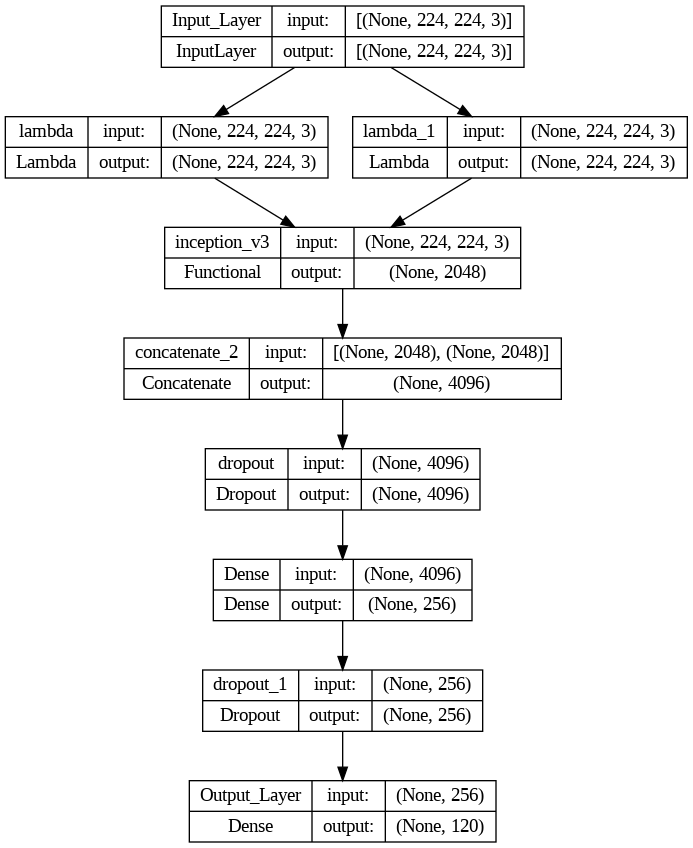

In [17]:
tf.keras.utils.plot_model(final_model, show_shapes=True)

In [18]:
final_model.compile(optimizer="adam", loss=tf.keras.losses.categorical_crossentropy, metrics = ["acc"])

In [19]:
final_model.fit(train_idg, batch_size= batch_size, epochs = 10, 
                validation_data = val_idg)

Epoch 1/10
144/144 [==============================] - 84s 461ms/step - loss: 2.2676 - acc: 0.4875 - val_loss: 0.8771 - val_acc: 0.7515
Epoch 2/10
144/144 [==============================] - 57s 392ms/step - loss: 1.0610 - acc: 0.7116 - val_loss: 0.7901 - val_acc: 0.7730
Epoch 3/10
144/144 [==============================] - 62s 428ms/step - loss: 0.9264 - acc: 0.7453 - val_loss: 0.7734 - val_acc: 0.7789
Epoch 4/10
144/144 [==============================] - 56s 391ms/step - loss: 0.8474 - acc: 0.7608 - val_loss: 0.8309 - val_acc: 0.7534
Epoch 5/10
144/144 [==============================] - 58s 399ms/step - loss: 0.7988 - acc: 0.7717 - val_loss: 0.7396 - val_acc: 0.7789
Epoch 6/10
144/144 [==============================] - 57s 393ms/step - loss: 0.7436 - acc: 0.7810 - val_loss: 0.7788 - val_acc: 0.7642
Epoch 7/10
144/144 [==============================] - 57s 398ms/step - loss: 0.6836 - acc: 0.7954 - val_loss: 0.8130 - val_acc: 0.7750
Epoch 8/10
144/144 [==============================] - 5